In [1]:
%matplotlib inline

import matplotlib as pyplot
import pandas as pd
from sklearn import tree

In [2]:
df = pd.read_csv(r'C:\Users\tonyb\Documents\BOSCOBRAND GIT\GITHUB\Marketing_KPI_Project\data\bank-additional\bank-full.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df['conversion']=df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [7]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

**CONVERSION RATE**

In [8]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0]*100.0
)

In [9]:
conversion_rate_df.T
# 0 = those who have not subscribed, 1 = those that have

conversion,0,1
y,88.30152,11.69848


**CONVERSION RATE BY JOB**

In [10]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count()*100.0

In [11]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

In [12]:
#students convert more frequently than others, then retired

NameError: name 'plt' is not defined

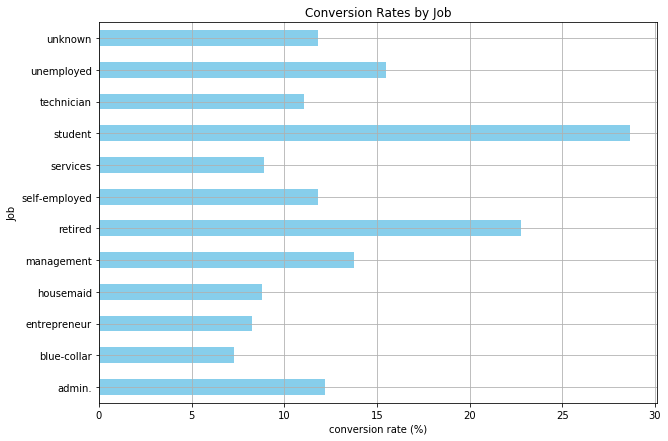

In [13]:
ax= conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10,7),
    title ='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

**DEFAULT BY CONVERSION**

In [14]:
default_by_conversion_df = pd.pivot_table(
    df,
    values='y',
    index='default',
    columns='conversion',
    aggfunc=len
)

In [15]:
default_by_conversion_df
# 0 = those who have not subscribed, 1 = those that have

conversion,0,1
default,,
no,39159,5237
yes,763,52


NameError: name 'plt' is not defined

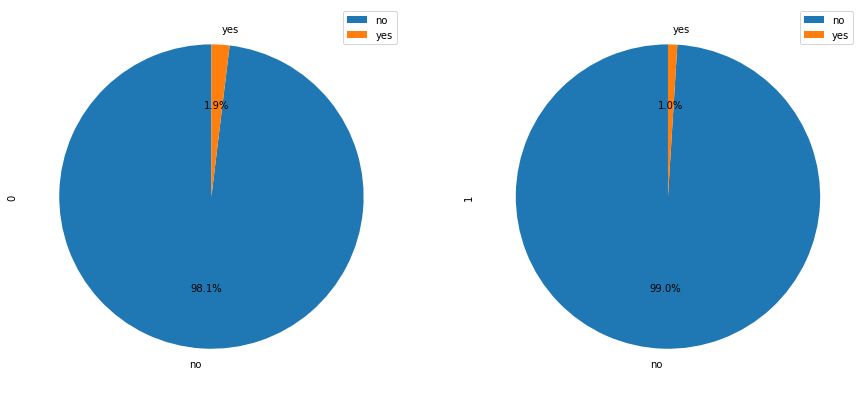

In [16]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

**AVERAGE BANK BALANCE DISTRBUTIONS BY CONVERSION**

NameError: name 'plt' is not defined

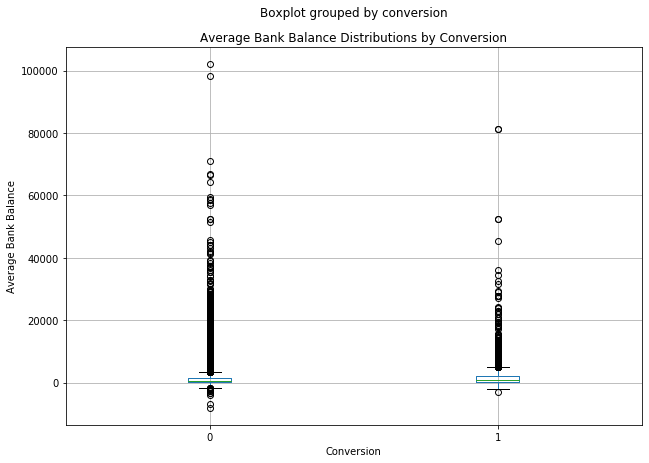

In [17]:
ax = df[['conversion','balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10,7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

NameError: name 'plt' is not defined

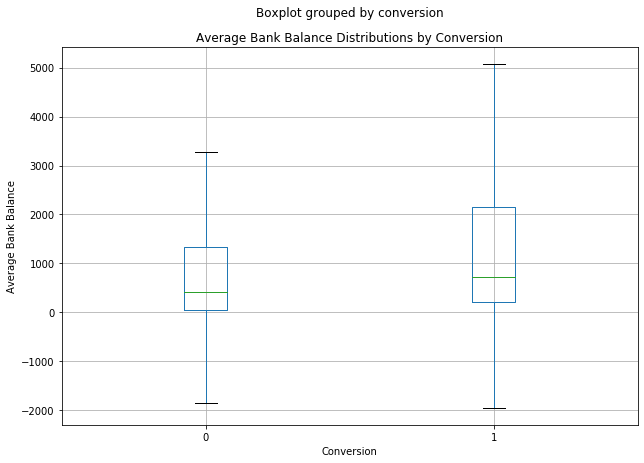

In [18]:
ax = df[['conversion','balance']].boxplot (
    by='conversion',
    showfliers=False,
    figsize=(10,7),
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

**CONVERSION RATES BY NUMBER OF CONTACTS**

In [19]:
conversions_by_num_contacts = df.groupby (
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100

In [22]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


NameError: name 'plt' is not defined

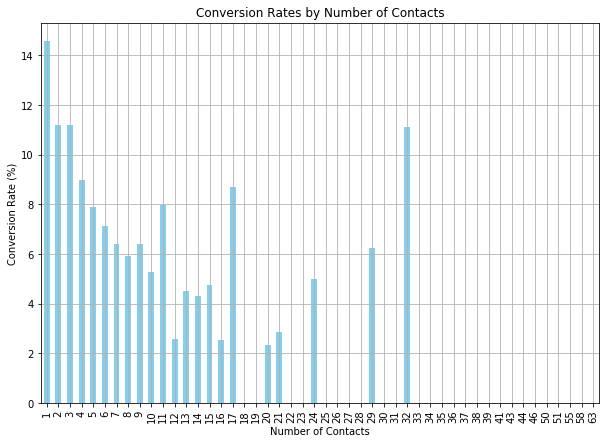

In [36]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

**ENCODING CATEGORICAL VARIABLES**

In [38]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [40]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [41]:
df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [43]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [44]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

**ENCODING JOBS**

In [45]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [46]:
jobs_encoded_df=pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [48]:
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


**ENDCODING MARITAL STATUS**

In [50]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [51]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [52]:
df=pd.concat([df, marital_encoded_df],axis=1)

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


**ENCODE HOUSING AND LOAN VARIABLES**

In [54]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [56]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [57]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [58]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

**FITTING DECISION TREES**

In [59]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [60]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [80]:
dt_model=tree.DecisionTreeClassifier(max_depth=4)

In [81]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
import graphviz

In [83]:
dot_data = tree.export_graphviz(
    dt_model, 
    feature_names=features,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph=graphviz.Source(dot_data)

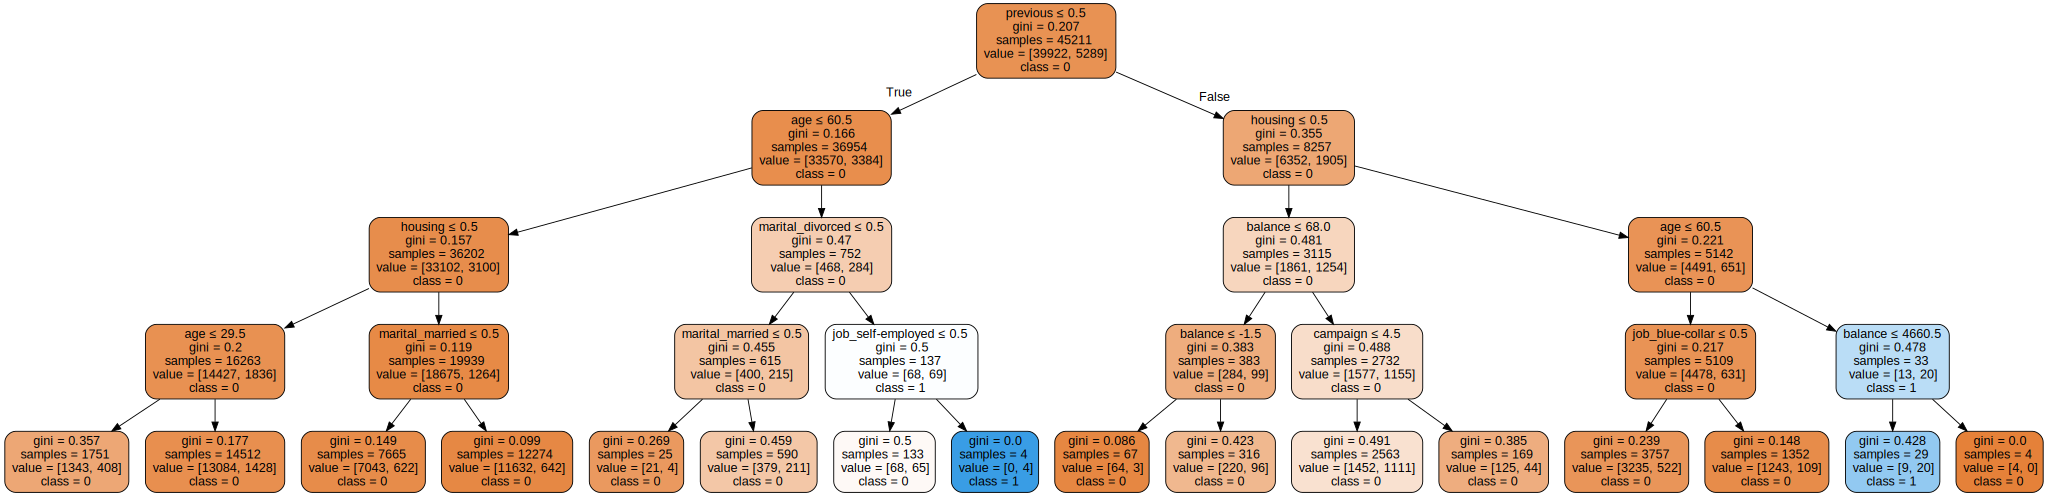

In [84]:
graph

In [ ]:
#class 1 = conversion....class 0 = non-conversion

**INSIGHTS**

- Those who were not contacted before before the campaign, who are older than 60.5, divorced and self employed have a high chance of converting

- Customers who were contacted before this campaign, that have a housing loan, are older than 60.5 and have a bank balance less than 4,660.50 belong to this node and 20 out of 29 of them converted and subscribed to a term deposit




In [99]:
#from graphviz import Source
#from sklearn import tree
#Source( tree.export_graphviz(dt_model, out_file=None, feature_names=features))

In [112]:
graph = Source( tree.export_graphviz(dt_model, out_file=None, feature_names=features))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'